# Linear regression 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# dataset = pd.read_csv('Salary_Data.csv')
# x = dataset.iloc[:, :-1].values
# y = dataset.iloc[:, -1].values
# dataset.head()
dataset = pd.read_csv('http://users.stat.ufl.edu/~winner/data/lsd.dat', delim_whitespace=True, index_col=False, header=None)

#print the first few rows of the data 
dataset.head()

,0,1
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [3]:
dataset.columns = ['Tissue concentration', 'Math score']

dataset.head()

,Tissue concentration,Math score
0,1.17,78.93
1,2.97,58.20
2,3.26,67.47
3,4.69,37.47
4,5.83,45.65


In [4]:
data = dataset.to_numpy()
data

array([[ 1.17, 78.93],
       [ 2.97, 58.2 ],
       [ 3.26, 67.47],
       [ 4.69, 37.47],
       [ 5.83, 45.65],
       [ 6.  , 32.92],
       [ 6.41, 29.97]])

## we have to predict the mathscore based on the tissue concentration

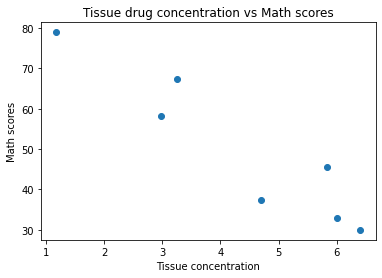

In [5]:
plt.scatter(dataset['Tissue concentration'], dataset['Math score'])

plt.title("Tissue drug concentration vs Math scores")
plt.xlabel("Tissue concentration")
plt.ylabel("Math scores")
plt.show()

In [6]:
x = data[:, :-1]
y = data[:, -1]

print(x,y)

[[1.17]
 [2.97]
 [3.26]
 [4.69]
 [5.83]
 [6.  ]
 [6.41]] [78.93 58.2  67.47 37.47 45.65 32.92 29.97]


computing x mean and y mean

In [7]:
y.reshape(7,1)

array([[78.93],
       [58.2 ],
       [67.47],
       [37.47],
       [45.65],
       [32.92],
       [29.97]])

In [8]:
n = len(x)
print(n)

7


In [9]:
x_bar = 0
y_bar = 0

for i in range(n):
    x_bar += float(dataset.iat[i,0])
    y_bar += float(dataset.iat[i,1])
x_bar /= n
y_bar /= n
print('x_bar',x_bar, 'y_bar :',y_bar)

print(x.mean())  # this is simple by using numpy array
print(y.mean())

x_bar 4.332857142857143 y_bar : 50.08714285714286
4.332857142857143
50.08714285714286


In [10]:
sigma_xy = 0  #computing (x^i - x_bar)(y^i-y_bar)
sigma_xx = 0  #computing (x^i - x_bar)^2 

for i in range(n):
    sigma_xx += (float(dataset.iat[i,0]) - x_bar) ** 2
    sigma_xy += ((float(dataset.iat[i,0])-x_bar) * ((float(dataset.iat[i,1])-y_bar)))
print('sigma_xx:',sigma_xx, 'sigma_xy:',sigma_xy)

p = x.mean()
q = y.mean()
print(((x-p)**2).sum())
print(((x-p)*(y-q)).sum())

sigma_xx: 22.474942857142857 sigma_xy: -202.48724285714292
22.474942857142857
-5.684341886080802e-14


In [11]:
m = sigma_xy/sigma_xx
c = (y_bar) - (m * (x_bar))

print('m:', m, 'c:', c)

m: -9.009466415296783 c: 89.12387376799306


In [12]:
#compute the left and right limits of the x-axis
x_min = 9999
x_max = -9999

for i in range(n): #access each row from the data set 
  x_i = float(dataset.iat[i,0]) #access element at Tissue concentration column
  if x_i > x_max:
    x_max = x_i 
  if x_i < x_min:
    x_min = x_i

x_min = x_min - 1
x_max = x_max + 1 

print('x_min:',x_min,'x_max:',x_max)

x_min: 0.16999999999999993 x_max: 7.41


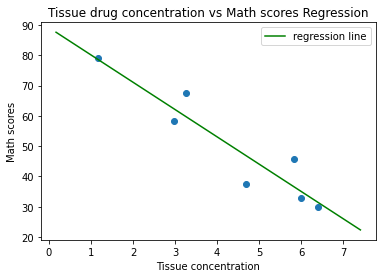

In [13]:
x = np.linspace(x_min,x_max,100) #creates a series of points in x axis
y = m*x+c
plt.plot(x, y, '-g', label='regression line')
plt.scatter(dataset['Tissue concentration'], dataset['Math score'])

plt.title("Tissue drug concentration vs Math scores Regression")
plt.xlabel("Tissue concentration")
plt.ylabel("Math scores")
plt.legend(loc='upper right')
#plt.grid()
plt.show()

# residual plot

In [14]:
residual = []  # creating empty list

for i in range(n):
    x_i = float(dataset.iat[i,0])
    y_i = float(dataset.iat[i,1])

    y_pred_i = m *x_i + c
    res = y_i - y_pred_i

    residual.append(res)  # push in the empty list

print(residual)




[0.347201937904174, -4.16575851456161, 7.7169867458744505, -9.399476280251143, 9.051315433187185, -2.1470752762123624, -1.4031940459406798]


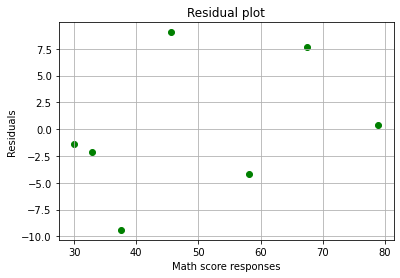

In [15]:
plt.scatter(dataset['Math score'], residual, color ='g')

plt.title("Residual plot")
plt.xlabel("Math score responses")
plt.ylabel("Residuals")
plt.grid()
plt.show()

## Correleation between the variable

$\Large{\text{Correlation between the variables}}$

It is useful to understand how the response variable is correlated with the predictor variable. 

One quantity useful to measure the correlation between the response variable and the predictor variable is the $\textbf{sample correlation}$ given by:

$
\begin{align}
\text{corr}(X,Y) = \frac{\Sigma_{XY}}{(n-1)s_X s_Y}
\end{align}
$
where 

$
\begin{align}
\text{recall } \Sigma_{XY} &= \sum_{i=1}^{n} (x^i - \bar{x}) (y^i - \bar{y}), \\
s_X &= \sqrt{\frac{1}{n-1} \Sigma_{XX} } = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x^i-\bar{x})^2 } \\
s_Y &= \sqrt{\frac{1}{n-1} \Sigma_{YY} } = \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (y^i-\bar{y})^2 } 
\end{align}
$

$\text{Note}$ that $s_X$ and $s_Y$ are sample standard deviations of $X$ and $Y$ respectively. 

$\textbf{Exercise:}$ Verify that sample correlation can be equivalently written as

$
\begin{align}
\text{corr}(X,Y) = \frac{\Sigma_{XY}}{\sqrt{\Sigma_{XX}\Sigma_{YY}}}
\end{align}
$
where recall that: 

$
\begin{align}
\Sigma_{XX} &= \sum_{i=1}^{n} (x^i - \bar{x})^2 \\
\Sigma_{YY} &= \sum_{i=1}^{n} (y^i - \bar{y})^2
\end{align}
$. 

It is also known that $-1 \leq \text{corr}(X,Y) \leq 1$.


In [16]:
# need to calculate sigma_yy
sigma_yy = 0
for i in range(n):
    y_i = float(dataset.iat[i,1])
    sigma_yy += (y_i - y_bar)**2

print('sigma_yy', sigma_yy)


sigma_yy 2078.183342857143


In [17]:
sample_correlation = sigma_xy/(np.sqrt(sigma_xx*sigma_yy))

print(sample_correlation)

-0.9369284768740831


$\Large{\text{Coefficient of multiple determination}}$ 

Consider the term 

$
\begin{align}
\Sigma_{YY} = \sum_{i=1}^{n} (y^i - \bar{y})^2. 
\end{align}
$
This term $\Sigma_{YY}$ measures the $\textbf{observed total variation of the response}$, without considering the effect of predictor variables. 

When we have access to a predictor variable, then the $\textbf{unexplained variation of response variable given the predictor variable}$ is given by the sum of squared residuals:

$
\begin{align}
L = \sum_{i=1}^{n} (e^i)^2. 
\end{align}
$

Define the term:

$
\begin{align}
\text{SSD} = \Sigma_{YY}- L
\end{align}
$

as the difference between observed total variation of the response and the unexplained variation given the predictor. Hence this can be considered as $\textbf{variability explained by the regression on the predictor variable}$ or $\textbf{fraction of variance explained by the regression on the predictor variable}$. 

Assuming $\Sigma_{YY}\neq 0$, consider: 

$
\begin{align}
\frac{\text{SSD}}{\Sigma_{YY}} = 1- \frac{L}{\Sigma_{YY}}.
\end{align}
$
Here the term $\frac{\text{SSD}}{\Sigma_{YY}}$ denotes the proportion of observed variability in the response variable which is explained by the regression on the predictor variable. From the equality, this proportion of observed variability given the predictor is simply $1$ minus the proportion of unexplained variability. 

This term $\frac{\text{SSD}}{\Sigma_{YY}}$ denoting the proportion of observed variability which is explained by the predictor variable has a special name called $\textbf{coefficient of multiple determination}$ and is denoted by $R^2$. 

It is known that $0\leq R^2 \leq 1$. 

Under some assumptions on the error $e^i$, it can be shown that $R^2 = (\text{corr}(X,Y))^2$.

In [18]:
score = sample_correlation**2
print(score)

0.8778349707775892


In [19]:
#sum of squared residuals

ssd = 0

for i in range(n):
    x_i = float(dataset.iat[i,0])
    y_i = float(dataset.iat[i,1])
    y_pred_i = m*x_i + c
    ssd += (y_i - y_pred_i)**2

print(ssd)

253.88132880967103


In [20]:
coeff_of_multiple_determination = 1-(ssd/sigma_yy)

print(coeff_of_multiple_determination)

0.8778349707775888


$\textbf{Effect of standardization}$ 

Often it becomes useful to standardize the random variable realizations as:

${{x_{\star}^i}} = \frac{(x^i - \bar{x})}{S_X}$, ${{y_\star^i}} = \frac{(y^i - \bar{y})}{S_Y}$. 

Recall that

$
\begin{align}
\bar{x} &= \frac{1}{n} \sum_{i=1}^{n} x^i \\
\bar{y} &= \frac{1}{n} \sum_{i=1}^{n} x^i \\
S_X &= \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (x^i - \bar{x})^2}, \\
S_Y &= \sqrt{\frac{1}{n-1} \sum_{i=1}^{n} (y^i - \bar{y})^2}.
\end{align}
$

By standardizing, we mean to represent each variable using units of standard deviation from its mean. 

$\textbf{Exercise:}$
If we use the linear regression model for these standardized variables, show that $\beta_0 = 0$ and $\beta_1 = \text{corr}(X,Y)$.

Hence the linear model obtained for standardized variables is of the form: $E[Y_\star|X_⋆=x_\star] = \beta_1 x_\star  = \text{corr}(X,Y) x_\star$. 

This indicates that the regression line passes through the origin and has slope $\beta_1 = \text{corr}(X,Y)$. 



In [21]:
s_x = (sigma_xx/(n-1))**(.5)
s_y = (sigma_yy/(n-1))**(.5)

x_new = []
y_new = []

for i in range(n):
    x_n = (float(dataset.iat[i,0]) - x_bar)/s_x
    x_new.append(x_n)
    y_n = (float(dataset.iat[i,1])-y_bar)/s_y
    y_new.append(y_n)

print(x_new,y_new)


[-1.6342026244411574, -0.7041686105315555, -0.5543297971794532, 0.18453055831539744, 0.7735521004581452, 0.8613886462162741, 1.07322972716235] [1.549786859961047, 0.43592073193257974, 0.9340171625560184, -0.6779453960958873, -0.23841693843680103, -0.9224263841580929, -1.0809360357588638]


In [22]:
dataset["x_new"] = x_new
dataset["y_new"] = y_new

In [23]:
dataset.head()

,Tissue concentration,Math score,x_new,y_new
0,1.17,78.93,-1.634203,1.549787
1,2.97,58.20,-0.704169,0.435921
2,3.26,67.47,-0.554330,0.934017
3,4.69,37.47,0.184531,-0.677945
4,5.83,45.65,0.773552,-0.238417


In [24]:
x_bar = 0
y_bar = 0

for i in range(n):
    x_bar += float(dataset.iat[i,2])
    y_bar += float(dataset.iat[i,3])
x_bar /= n
y_bar /= n
print('x_bar',x_bar, 'y_bar :',y_bar)

print(x.mean())  # this is simple by using numpy array
print(y.mean())

x_bar 1.2688263138573217e-16 y_bar : -3.172065784643304e-17
3.79
54.97799605401825


In [25]:
sigma_xy = 0  #computing (x^i - x_bar)(y^i-y_bar)
sigma_xx = 0  #computing (x^i - x_bar)^2 

for i in range(n):
    sigma_xx += (float(dataset.iat[i,2]) - x_bar) ** 2
    sigma_xy += ((float(dataset.iat[i,2])-x_bar) * ((float(dataset.iat[i,3])-y_bar)))
print('sigma_xx:',sigma_xx, 'sigma_xy:',sigma_xy)

sigma_xx: 6.0 sigma_xy: -5.621570861244498


In [26]:
m = sigma_xy/sigma_xx
c = (y_bar) - (m * (x_bar))

print('m:', m, 'c:', c)

m: -0.936928476874083 c: 8.715929271957671e-17
